In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Opening raw data text file loaded from iterating over json based files


In [2]:
file = open("C:\\Users\Silmi\Desktop\para1.txt", "r")

### Reading all data by line and assign it to a list of sentences

In [3]:
doclist = [ line for line in file ]
docstr = '' . join(doclist)
sentences = re.split(r'[.!?]', docstr)

In [4]:
#creating a sentences data frame almost as a seriese
df_sentences=pd.DataFrame(sentences,columns=[" col 1"])
#df_sentences.to_csv (r'C:\Users\silmi\Desktop\export_dataframe.csv', index = False, header=True)



In [5]:
df_incubation_sentences= df_sentences[df_sentences[" col 1"].str.contains('incubation')]


In [6]:
text = df_incubation_sentences[' col 1'].values
incubation_times=[]
float_times=[]
int_times=[]

In [7]:
for t in text:
    for sentence in t.split(". "):
        if "incubation" in sentence:
            iday=re.findall(r" \d{1,2} day| \d{1,2}.\d{1,2} day",sentence)
            if len(iday)==1:
                num=iday[0].split(" ")
                incubation_times.append(num[1])


In [8]:
#including the ranged data -example(3-9)- by taking the average.
for row in incubation_times:
    if "-" in row:
        day=row.split('-')
       
        num1=int(day[0])
        num2=int(day[1])
        num3=(num1+num2)/2
        back=str(num3)
        
        new=row.replace(row, back)
        float_times.append(new)
                               

        

In [9]:
for row in incubation_times:
    if(len(row)<3):
        int_times.append(row)
    

In [10]:
incubation_int_float=[]
incubation_int_float=int_times+float_times
df_incubation=pd.DataFrame(incubation_int_float, columns=["duration"])


In [11]:
df_incubation["duration"] = pd.to_numeric(df_incubation["duration"])
df_incubation=df_incubation[df_incubation["duration"]<40]

In [12]:
df_incubation.mean()

duration    9.335962
dtype: float64

In [13]:
df_incubation=df_incubation.reset_index()
df_incubation=df_incubation.reset_index()

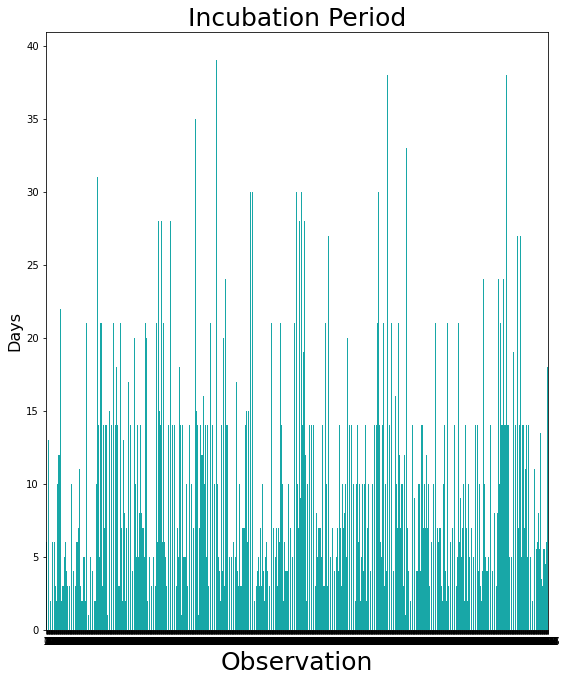

In [14]:

fig, ax1 = plt.subplots(figsize=(9,11))


    
ax1.set_title('Incubation Period', fontsize=25, color="black")

ax1=sns.barplot(x='level_0',y='duration', data=df_incubation,color = 'c')
ax1.set_xlabel('Observation', fontsize=25)
ax1.set_ylabel('Days', fontsize=16)

color = 'tab:blue'


plt.show()

In [15]:
df_graph=df_incubation.rolling(75).mean()
df_graph=df_graph.dropna()


In [16]:
df_graph.head()


,level_0,index,duration
74,37.0,37.440000,7.653333
75,38.0,38.453333,7.560000
76,39.0,39.466667,7.520000
77,40.0,40.480000,7.520000
78,41.0,41.493333,7.760000


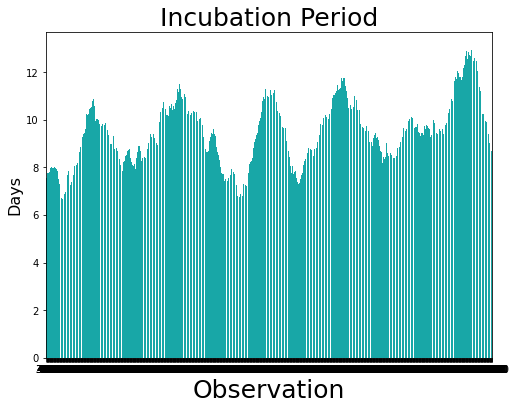

In [18]:

fig, ax1 = plt.subplots(figsize=(8,6))


    
ax1.set_title('Incubation Period', fontsize=25, color="black")

ax1=sns.barplot(x='level_0',y='duration', data=df_graph,color = 'c')
ax1.set_xlabel('Observation', fontsize=25)
ax1.set_ylabel('Days', fontsize=16)

color = 'tab:blue'


plt.show()